<a href="https://colab.research.google.com/github/dima12121291/data_analysis_project/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


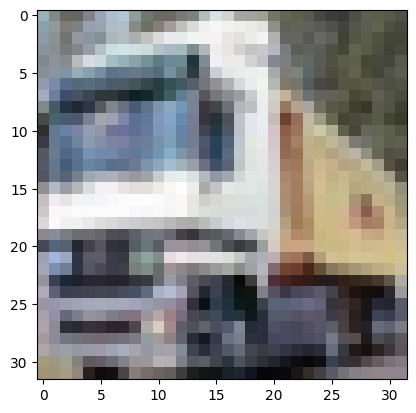

Номер класса: [9]
Тип объекта: грузовик


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,676,842 (6.40 MB)

 Trainable params: 1,676,842 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

None


In [3]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка',
'лошадь', 'корабль', 'грузовик']

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#Просмотр примеров данных
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])
#Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)


# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [4]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/25
352/352 - 16s - 46ms/step - accuracy: 0.3983 - loss: 1.6377 - val_accuracy: 0.5510 - val_loss: 1.2507
Epoch 2/25
352/352 - 3s - 10ms/step - accuracy: 0.5595 - loss: 1.2207 - val_accuracy: 0.6320 - val_loss: 1.0530
Epoch 3/25
352/352 - 3s - 10ms/step - accuracy: 0.6340 - loss: 1.0419 - val_accuracy: 0.7000 - val_loss: 0.8643
Epoch 4/25
352/352 - 5s - 15ms/step - accuracy: 0.6779 - loss: 0.9193 - val_accuracy: 0.7230 - val_loss: 0.7885
Epoch 5/25
352/352 - 5s - 14ms/step - accuracy: 0.7029 - loss: 0.8452 - val_accuracy: 0.7374 - val_loss: 0.7467
Epoch 6/25
352/352 - 5s - 15ms/step - accuracy: 0.7264 - loss: 0.7793 - val_accuracy: 0.7540 - val_loss: 0.7244
Epoch 7/25
352/352 - 3s - 10ms/step - accuracy: 0.7434 - loss: 0.7317 - val_accuracy: 0.7498 - val_loss: 0.7240
Epoch 8/25
352/352 - 3s - 9ms/step - accuracy: 0.7531 - loss: 0.6956 - val_accuracy: 0.7740 - val_loss: 0.6536
Epoch 9/25
352/352 - 3s - 9ms/step - accuracy: 0.7700 - loss: 0.6512 - val_accuracy: 0.7740 - val_loss: 

Точность работы на тестовых данных: 79.77%


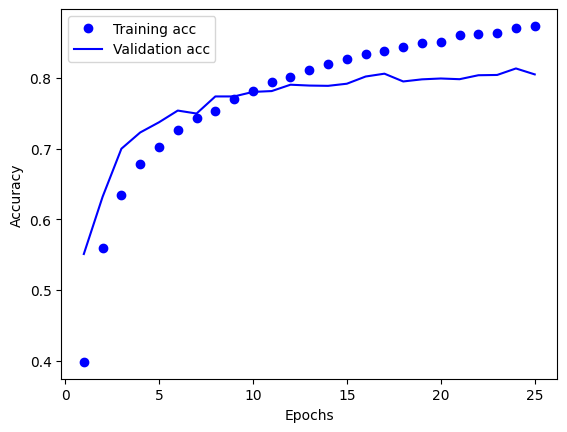

cifar10_model.json  cifar10_model.weights.h5  sample_data


In [7]:

# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.weights.h5")

!ls


In [6]:
from google.colab import files
files.download("cifar10_model.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

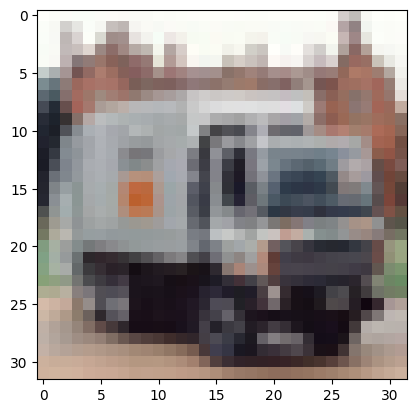

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
[[2.6006027e-12 1.1709094e-05 1.8016216e-16 1.7352879e-16 4.0607039e-21
  9.2431766e-20 6.1879582e-22 1.7248398e-17 1.2041859e-12 9.9998832e-01]]
грузовик
грузовик


Saving КОтикЗлой.png to КОтикЗлой.png


{'КОтикЗлой.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01X\x00\x00\x01H\x08\x06\x00\x00\x00\x15\xba\xe6\xdb\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x02\xc3UIDATx\x9c\xe4\xfd\xe9\xb3$\xd9u\x1f\x08\xfe\xce\xdd|\x89\x88\xb7\xe4VU\x00\xaa@\x82\x00)\x82\xa0$\x88l\x01 H\x10"\xa9\x95\x14\xc5\xee\x19uk\xa7l\xfe\xb8\xf92\xd66\xd6\x92M\xcb\xd4\xcd\x91I\x1aI-.\xe2\x8a\x1d(TVVfVno\x8d\xc5\x97\xbb\x9c\xfep\xfd\xba{\xf8\x8bx/\xb3\xaa\x80&8\xd7,,"|\xbd\xeb\xb9g\xfd\x1d\xfa\xa5/|\x16\x00\xc0\xcc\x18\x97\x10\xc2\xd6\xf1\xe9w*J)\xccf3\xccf3H\xa9\xd04\r\x9a\xa6\x86\xd6\x06\xcc\xdc\x7f\x88\x08B\x08\x10Q\xfc\x08\x02\x87\xf8,\x124\xbc\xd7\x87\xadw\xa4\xeb\xa5\x8c\xf7\xa6c\xce{\x00\x80\xa0t\xaf\xd8\xaa\x17\x91\xe8\xaf\x05\x00\x82\xdc:/\x84\x1a\xb7v\xebZ\x00`\xf8\xc9\xf3v\xf7\xcf\xb4\x9e\xe3:^WH(8\x02\x14\x0b8\n\xd0P\xf0"@\xb1D\x90\x01\x9a4<\x05H\x16\xf0\x14\xa0 \xfb\xff@\x00\x98\xa1\x11\xdf\xe1\xbb\xfeK}\x11\xc6\xed&\x82\x18\xd5\x9f\x88\x10 \x00\x08x\xc2\x95\xfa\xa6o!

In [11]:
# Прямой способ, если X_test содержит корректный формат изображения:
plt.imshow(X_test[index])
plt.show()

x = X_test[index]
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)

print(prediction)

prediction = np.argmax(prediction)
print(classes[prediction])

print(classes[y_test[index][0]])

from google.colab import files
files.upload()

cifar10_model.json  cifar10_model.weights.h5  sample_data  КОтикЗлой.png


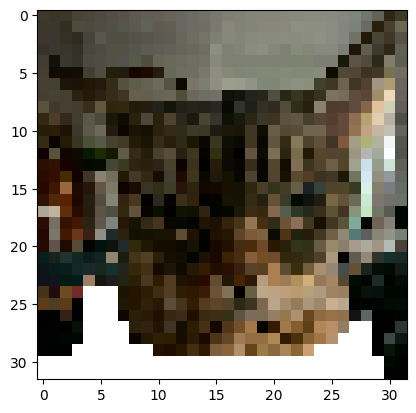

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
кот


In [12]:

!ls


img_path = 'КОтикЗлой.png'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()


x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])